In [25]:
# 沪市指数走势预测，使用ARMA模型
# 区别于ARIMA, 没有差分
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings

In [26]:
warnings.filterwarnings("ignore")

In [27]:
# 数据加载
# 数据格式: Timestamp, Price, stock_volume, amount_volume
df = pd.read_csv("shanghai_index_1990_12_19_to_2019_12_11.csv")
df = df[['Timestamp','Price']]

In [28]:
# 把timestamp作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp

In [29]:
# 数据探索
print(df.head())

            Timestamp   Price
Timestamp                    
1990-12-19 1990-12-19   99.98
1990-12-20 1990-12-20  104.39
1990-12-21 1990-12-21  109.13
1990-12-24 1990-12-24  114.55
1990-12-25 1990-12-25  120.25


In [30]:
print(df)

            Timestamp      Price
Timestamp                       
1990-12-19 1990-12-19    99.9800
1990-12-20 1990-12-20   104.3900
1990-12-21 1990-12-21   109.1300
1990-12-24 1990-12-24   114.5500
1990-12-25 1990-12-25   120.2500
...               ...        ...
2019-12-05 2019-12-05  2899.4685
2019-12-06 2019-12-06  2912.0136
2019-12-09 2019-12-09  2914.4775
2019-12-10 2019-12-10  2917.3157
2019-12-11 2019-12-11  2924.4173

[7086 rows x 2 columns]


In [31]:
# 进行粗略统计
df_month = df.resample("M").mean()
print(df_month)

                  Price
Timestamp              
1990-12-31   116.990000
1991-01-31   132.628182
1991-02-28   131.887778
1991-03-31   126.011429
1991-04-30   118.426818
...                 ...
2019-08-31  2847.063264
2019-09-30  2978.383790
2019-10-31  2954.832456
2019-11-30  2923.774700
2019-12-31  2900.789287

[349 rows x 1 columns]


In [32]:
df_Quarter = df.resample("Q-DEC").mean()
print(df_Quarter)

                  Price
Timestamp              
1990-12-31   116.990000
1991-03-31   130.131803
1991-06-30   117.945625
1991-09-30   160.548030
1991-12-31   240.092656
...                 ...
2018-12-31  2603.186602
2019-03-31  2792.941622
2019-06-30  3010.354852
2019-09-30  2923.130869
2019-12-31  2931.756749

[117 rows x 1 columns]


In [33]:
df_year = df.resample("A-DEC").mean()
print(df_year)

                  Price
Timestamp              
1990-12-31   116.990000
1991-12-31   162.543765
1992-12-31   668.515608
1993-12-31  1013.247004
1994-12-31   674.123214
1995-12-31   657.789203
1996-12-31   764.639478
1997-12-31  1175.584881
1998-12-31  1261.037159
1999-12-31  1377.330674
2000-12-31  1881.996556
2001-12-31  1956.159812
2002-12-31  1567.231135
2003-12-31  1467.738058
2004-12-31  1482.854667
2005-12-31  1153.550678
2006-12-31  1629.934141
2007-12-31  4237.692008
2008-12-31  3031.825398
2009-12-31  2765.430332
2010-12-31  2830.994508
2011-12-31  2666.891836
2012-12-31  2219.135486
2013-12-31  2191.699298
2014-12-31  2238.214951
2015-12-31  3721.552045
2016-12-31  3003.683787
2017-12-31  3249.687147
2018-12-31  2943.151610
2019-12-31  2914.817300


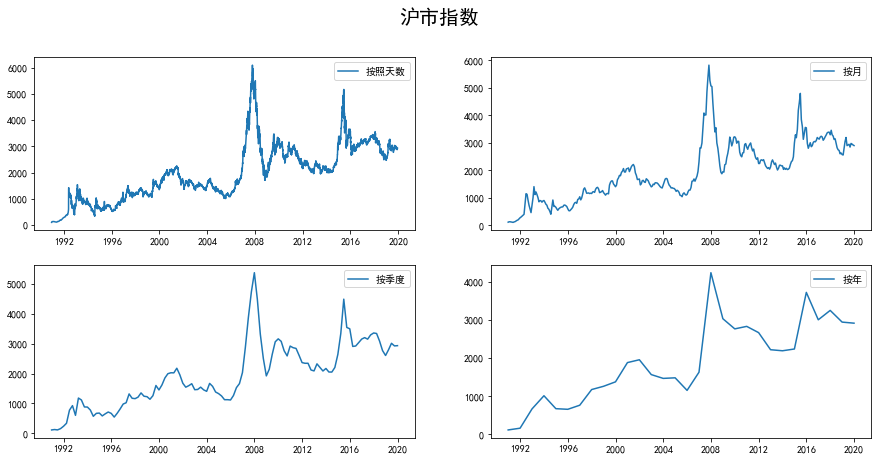

In [34]:
# 按照天，月，季度，年来显示沪指走势
fig = plt.figure(figsize=[15,7])
plt.rcParams['font.sans-serif']=['SimHei']
plt.suptitle("沪市指数",fontsize=20)
plt.subplot(221)
plt.plot(df.Price,'-',label="按照天数")
plt.legend()
plt.subplot(222)
plt.plot(df_month.Price,'-',label="按月")
plt.legend()
plt.subplot(223)
plt.plot(df_Quarter.Price,'-',label="按季度")
plt.legend()
plt.subplot(224)
plt.plot(df_year.Price,'-',label='按年')
plt.legend()
plt.show()

In [35]:
# 设置参数范围
from itertools import product
ps = range(0,3)
qs = range(0,3)
parameters = product(ps,qs)
parameters_list = list(parameters)
print(parameters_list)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [36]:
# 寻找最优ARMA模型参数,即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_month.Price,order=(param[0],param[1])).fit()
    except ValueError:
        print("参数错误: ",param)
        continue
    aic = model.aic
    if aic<best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param,model.aic])
print("最优模型: ",best_model.summary())

参数错误:  (0, 2)
最优模型:                                ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  349
Model:                     ARMA(2, 2)   Log Likelihood               -2271.637
Method:                       css-mle   S.D. of innovations            161.441
Date:                Sat, 21 Mar 2020   AIC                           4555.275
Time:                        23:53:20   BIC                           4578.405
Sample:                    12-31-1990   HQIC                          4564.482
                         - 12-31-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1866.2792    492.299      3.791      0.000     901.392    2831.167
ar.L1.Price     0.4987      0.130      3.844      0.000       0.244       0.753
ar.L2.Price     0.4659     

In [37]:
# 设置future_month,需要预测的时间data_list
import calendar
from datetime import datetime,timedelta
df_month2 = df_month[['Price']]
#print(df_month2)
future_month = 3
last_month = pd.to_datetime(df_month2.index[len(df_month2)-1])
#print(last_month)
date_list = []
for i in range(future_month):
    # 计算下个月有多少天
    year = last_month.year
    month = last_month.month
    if month==12:
        month =1
        year = year+1
    else:
        month = month+1
    next_month_days = calendar.monthrange(year,month)[1]
    last_month = last_month+timedelta(days=next_month_days)
    date_list.append(last_month)
print("date_list = ",date_list)

date_list =  [Timestamp('2020-01-31 00:00:00', freq='M'), Timestamp('2020-02-29 00:00:00', freq='M'), Timestamp('2020-03-31 00:00:00', freq='M')]


In [38]:
# 添加未来要预测的3个月
future = pd.DataFrame(index=date_list,columns=df_month.columns)
print(future)

           Price
2020-01-31   NaN
2020-02-29   NaN
2020-03-31   NaN


In [39]:
df_month2 = pd.concat([df_month2,future])
df_month2['forecast'] = best_model.predict(start=0,end=len(df_month2))
print(df_month2)

                  Price     forecast
1990-12-31   116.990000  1866.279247
1991-01-31   132.628182   138.905073
1991-02-28   131.887778   167.640266
1991-03-31   126.011429   161.647400
1991-04-30   118.426818   147.535094
...                 ...          ...
2019-11-30  2923.774700  2957.439315
2019-12-31  2900.789287  2847.681731
2020-01-31          NaN  2908.038294
2020-02-29          NaN  2887.623891
2020-03-31          NaN  2861.060080

[352 rows x 2 columns]


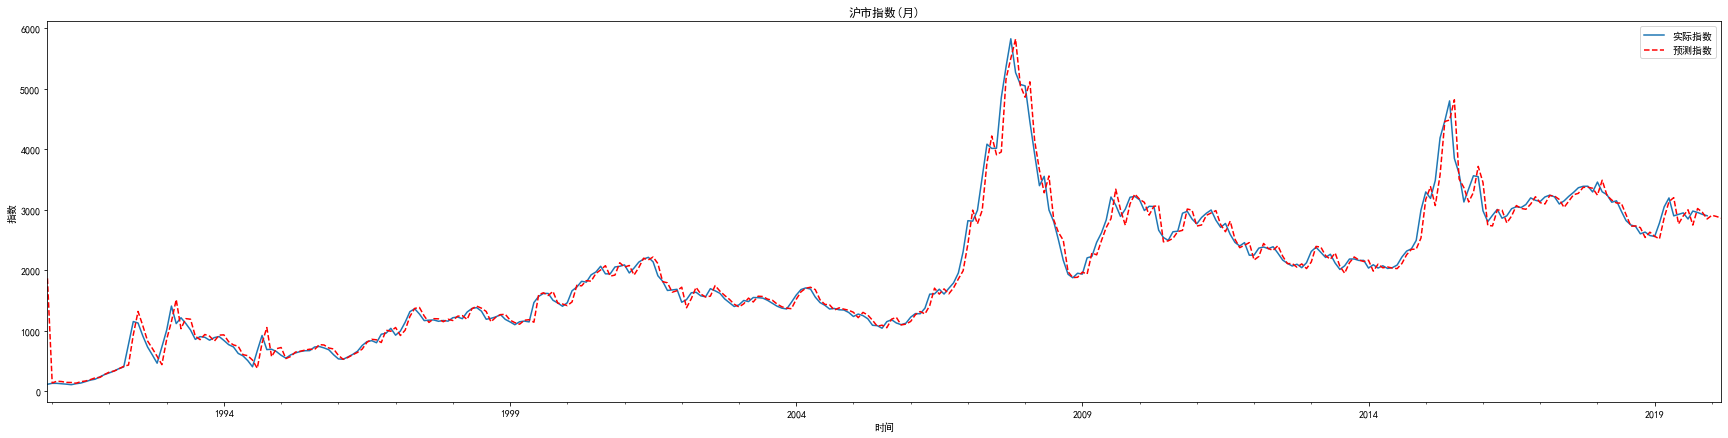

In [40]:
# 沪指预测结果显示
plt.figure(figsize=(30,7))
df_month2.Price.plot(label="实际指数")
df_month2.forecast.plot(color="r",ls="--",label="预测指数")
plt.legend()
plt.title("沪市指数(月)")
plt.xlabel("时间")
plt.ylabel("指数")
plt.show()